In [3]:
# import tensorflow and load dataset, which is part of tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.fashion_mnist

In [2]:
# load_data function returns a tuple containing the training and test data
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# each image is a numpy array, with each element representing a pixel with value between 0 and 255. This value quantifies the color of the pixel
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

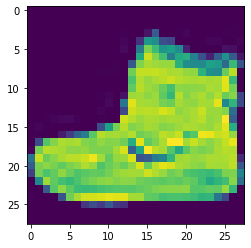

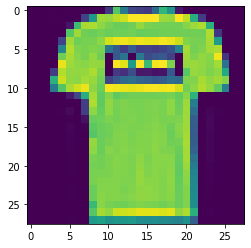

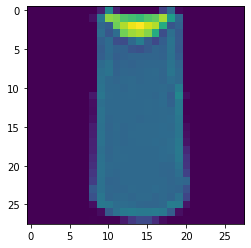

In [11]:
# using matplotlib, plot the first 3 images of the training dataset
plot1 = plt.figure(1)
plt.imshow(training_images[0])

plot2 = plt.figure(2)
plt.imshow(training_images[1])

plot3 = plt.figure(3)
plt.imshow(training_images[2])

plt.show()

In [12]:
# by dividing by 255, each element has a value between 0 and 1
# in other words, we have normalized the data
training_images = training_images / 255.0
test_images = test_images / 255.0

In [13]:
# create neural network with a dense layer containing 128 nodes; note that this is a very simple model 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))


In [14]:
# use adam optimizer, which is a type of stochastic gradient of descent
# the loss function is sparse categorical crossentropy because we are dealing with multi-label classification
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# set model to variable history so that previous performance can be tracked
history = model.fit(training_images,training_labels, epochs = 20,validation_data=(test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4987 - accuracy: 0.8256 - val_loss: 0.4218 - val_accuracy: 0.8509
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8644 - val_loss: 0.3797 - val_accuracy: 0.8628
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8794 - val_loss: 0.3832 - val_accuracy: 0.8588
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8848 - val_loss: 0.3515 - val_accuracy: 0.8736
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8910 - val_loss: 0.3575 - val_accuracy: 0.8672
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2804 - accuracy: 0.8974 - val_loss: 0.3431 - val_accuracy: 0.8764
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9010 - val_loss: 0.3459 - val_accuracy:

In [19]:
acc = history.history['accuracy']
lss = history.history['loss']
va = history.history['val_accuracy']
vl = history.history['val_loss']

In [20]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8891


[0.3434000611305237, 0.8891000151634216]

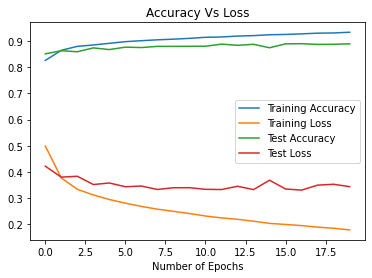

In [24]:
# plot each metric; notice that the test accuracy does not increase much beyond 5 epochs
# in fact, the training and test accuracies appear to be on the verge of diverging 
# conclusion: more epochs does not guarentee higher accuracy; the model itself will need to be improved
plt.plot(acc, label='Training Accuracy')
plt.plot(lss, label='Training Loss')
plt.plot(va, label='Test Accuracy')
plt.plot(vl, label= "Test Loss")
plt.legend()
plt.title("Accuracy Vs Loss")
plt.xlabel("Number of Epochs")
plt.show()